In [1]:
import sys, os; 
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from src.detr.detr import build_detr
from src.data.dataset import CPPE5Dataset, collate_fn
from src.losses.loss import DETRLoss
from src.data import transforms as T
from src.data.utils import visualize_output
from experiment.detr_config import DETRCPPEConfigSanityCheck
from experiment.detr_cppe5_experiment import DETRCPPE5Experiment
from runner.detr_runner import DETRRunner

from torch.utils.data import DataLoader
from PIL import Image

import torch
import numpy as np
import random
import json
import matplotlib.pyplot as plt

/home/leo/miniconda3/envs/cvrunner/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/leo/miniconda3/envs/cvrunner/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened bec

In [3]:
# Load random image from CPPE-5 dataset
img = Image.open('../assets/CPPE-5/images/1.png')
# Load annotation
with open('../assets/CPPE-5/annotations/train.json') as f:
    annotations = json.load(f)

In [4]:
target = {'labels': [], 'bboxes': []}
for annot in annotations['annotations']:
    if annot['image_id'] == 1:
        target['labels'].append(annot['category_id'])
        target['bboxes'].append(annot['bbox'])

In [5]:
transform = T.Compose(
    [T.ToTensor()]
)

In [6]:
img, target = transform(img, target)
target['bboxes'] = T.box_to_xy(torch.Tensor(target['bboxes']))

In [7]:
visualized_img = visualize_output(
    imgs = img.unsqueeze(0),
    masks = torch.zeros_like(img),
    image_ids = [1],
    out_labs = [torch.tensor(target['labels'])],
    out_bboxes = [torch.tensor(target['bboxes'])],
    gt_labs = [[]],
    gt_bboxes = [[]],
    unormalize = False
)[1]

/tmp/ipykernel_66363/1893972614.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_bboxes = [torch.tensor(target['bboxes'])],


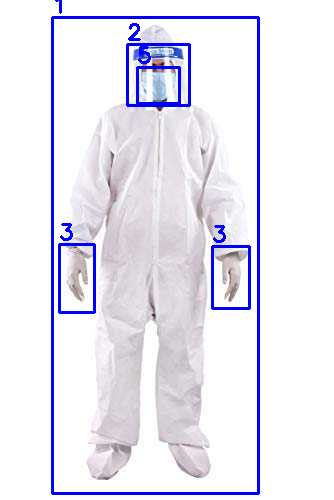

In [8]:
Image.fromarray(visualized_img)

# Less transformation

/tmp/ipykernel_66363/568415077.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_labs = [torch.tensor(target['labels'])],
/tmp/ipykernel_66363/568415077.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_bboxes = [torch.tensor(target['boxes'])],


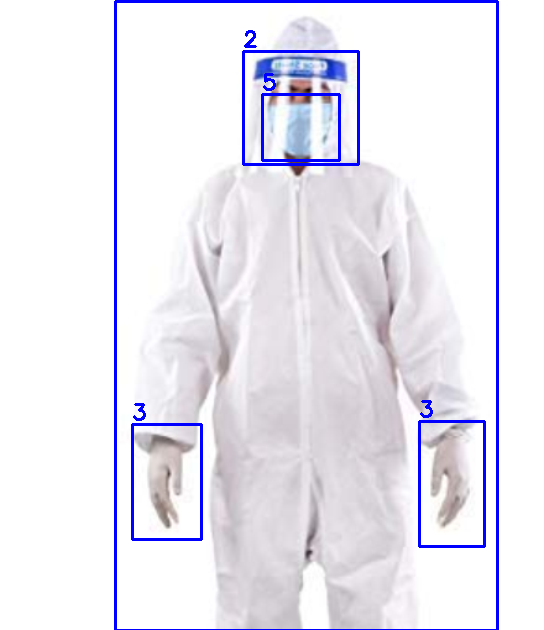

In [9]:
# Load random image from CPPE-5 dataset
img = Image.open('../assets/CPPE-5/images/1.png')
# Load annotation
with open('../assets/CPPE-5/annotations/train.json') as f:
    annotations = json.load(f)
    
target = {'labels': [], 'boxes': []}
for annot in annotations['annotations']:
    if annot['image_id'] == 1:
        target['labels'].append(annot['category_id'])
        target['boxes'].append(annot['bbox'])
        
scales = [480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800]

transform = T.Compose([
        T.RandomHorizontalFlip(),
        T.RandomSelect(
            T.RandomResize(scales, max_size=1333),
            T.Compose(
                [
                    T.RandomResize([400, 500, 600]),
                    T.RandomSizeCrop(384, 600),
                    T.RandomResize(scales, max_size=1333),
                ]
            ),
        ),
        T.ToTensor(),
        # T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
target['boxes'] = T.box_to_xy(torch.Tensor(target['boxes']))
target['labels'] = torch.Tensor(target['labels'])
img, target = transform(img, target)


visualized_img = visualize_output(
    imgs = img.unsqueeze(0),
    masks = torch.zeros_like(img),
    image_ids = [1],
    out_labs = [torch.tensor(target['labels'])],
    out_bboxes = [torch.tensor(target['boxes'])],
    gt_labs = [[]],
    gt_bboxes = [[]],
    unormalize = False
)[1]

Image.fromarray(visualized_img)

# Random horizontal flip

/tmp/ipykernel_66363/2452602964.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_labs = [torch.tensor(target['labels'])],
/tmp/ipykernel_66363/2452602964.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_bboxes = [torch.tensor(target['boxes'])],


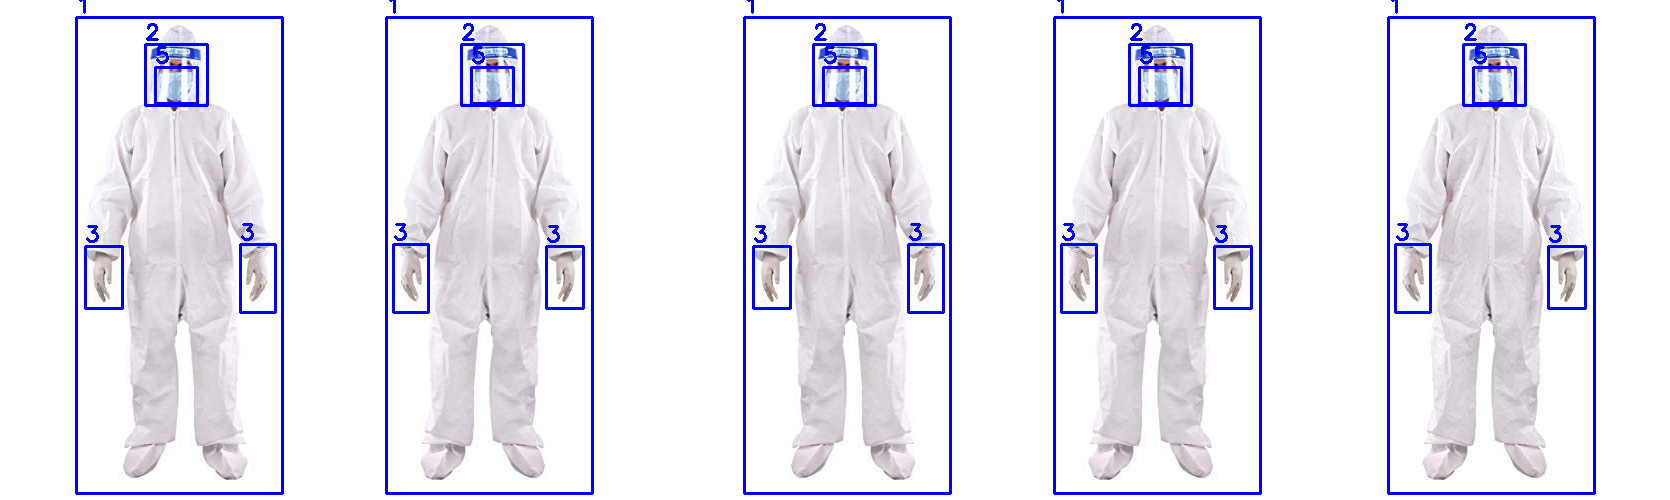

In [10]:
visualized_images = []
num_images = 5
for i in range(num_images):
    # Load random image from CPPE-5 dataset
    img = Image.open('../assets/CPPE-5/images/1.png')
    # Load annotation
    with open('../assets/CPPE-5/annotations/train.json') as f:
        annotations = json.load(f)
        
    target = {'labels': [], 'boxes': []}
    for annot in annotations['annotations']:
        if annot['image_id'] == 1:
            target['labels'].append(annot['category_id'])
            target['boxes'].append(annot['bbox'])
            
    scales = [480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800]
    
    transform = T.Compose([
            T.RandomHorizontalFlip(),
            T.ToTensor(),
            # T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    target['boxes'] = T.box_to_xy(torch.Tensor(target['boxes']))
    target['labels'] = torch.Tensor(target['labels'])
    img, target = transform(img, target)
    
    
    visualized_img = visualize_output(
        imgs = img.unsqueeze(0),
        masks = torch.zeros_like(img),
        image_ids = [1],
        out_labs = [torch.tensor(target['labels'])],
        out_bboxes = [torch.tensor(target['boxes'])],
        gt_labs = [[]],
        gt_bboxes = [[]],
        unormalize = False
    )[1]

    visualized_images.append(visualized_img)

Image.fromarray(np.concatenate(visualized_images, axis=1))

# Random Resize

/tmp/ipykernel_66363/927962778.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_labs = [torch.tensor(target['labels'])],
/tmp/ipykernel_66363/927962778.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_bboxes = [torch.tensor(target['boxes'])],


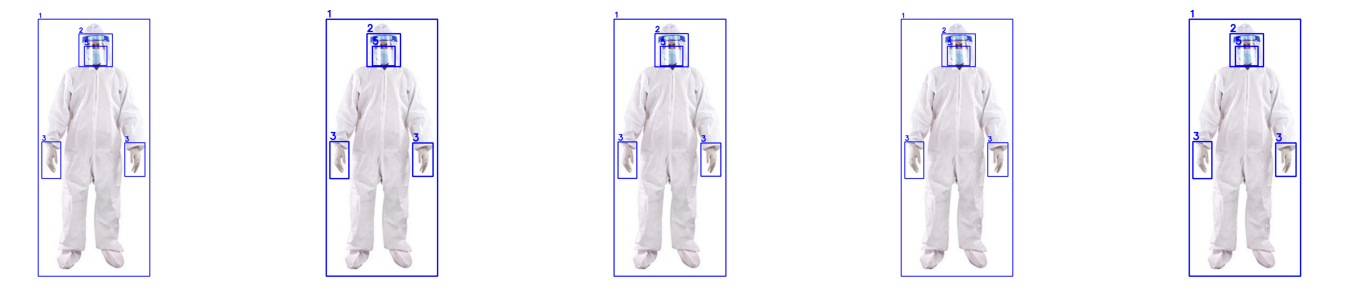

In [11]:
visualized_images = []
num_images = 5
for i in range(num_images):
    # Load random image from CPPE-5 dataset
    img = Image.open('../assets/CPPE-5/images/1.png')
    # Load annotation
    with open('../assets/CPPE-5/annotations/train.json') as f:
        annotations = json.load(f)
        
    target = {'labels': [], 'boxes': []}
    for annot in annotations['annotations']:
        if annot['image_id'] == 1:
            target['labels'].append(annot['category_id'])
            target['boxes'].append(annot['bbox'])
            
    scales = [480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800]
    
    transform = T.Compose([
            T.RandomResize([400, 500, 600]),
            T.ToTensor(),
            # T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    target['boxes'] = T.box_to_xy(torch.Tensor(target['boxes']))
    target['labels'] = torch.Tensor(target['labels'])
    img, target = transform(img, target)
    
    
    visualized_img = visualize_output(
        imgs = img.unsqueeze(0),
        masks = torch.zeros_like(img),
        image_ids = [1],
        out_labs = [torch.tensor(target['labels'])],
        out_bboxes = [torch.tensor(target['boxes'])],
        gt_labs = [[]],
        gt_bboxes = [[]],
        unormalize = False
    )[1]

    visualized_images.append(visualized_img)

# Create figure with 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, img in zip(axes, visualized_images):
    ax.imshow(img)
    ax.axis('off')  # hide axes for a clean look

plt.tight_layout()
plt.show()

# RandomSizeCrop

/tmp/ipykernel_66363/3904468342.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_labs = [torch.tensor(target['labels'])],
/tmp/ipykernel_66363/3904468342.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_bboxes = [torch.tensor(target['boxes'])],


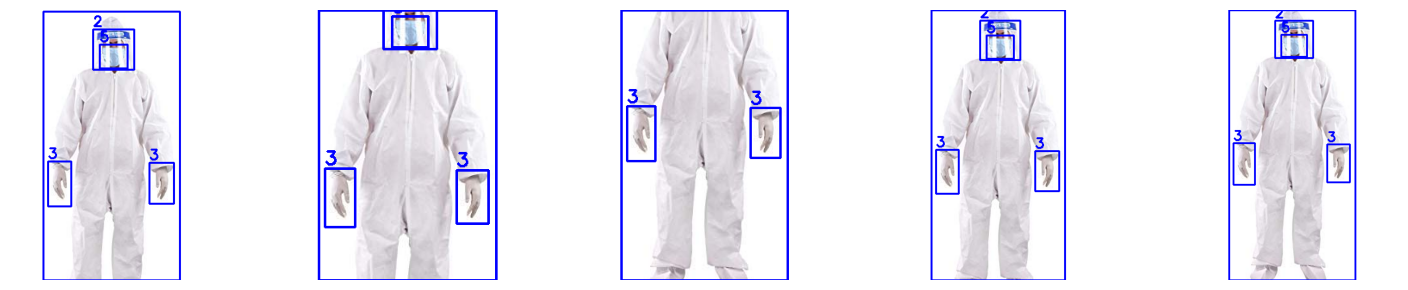

In [12]:
visualized_images = []
num_images = 5
for i in range(num_images):
    # Load random image from CPPE-5 dataset
    img = Image.open('../assets/CPPE-5/images/1.png')
    # Load annotation
    with open('../assets/CPPE-5/annotations/train.json') as f:
        annotations = json.load(f)
        
    target = {'labels': [], 'boxes': []}
    for annot in annotations['annotations']:
        if annot['image_id'] == 1:
            target['labels'].append(annot['category_id'])
            target['boxes'].append(annot['bbox'])
            
    scales = [480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800]
    
    transform = T.Compose([
            T.RandomSizeCrop(300, 600),
            T.ToTensor(),
            # T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    target['boxes'] = T.box_to_xy(torch.Tensor(target['boxes']))
    target['labels'] = torch.Tensor(target['labels'])
    img, target = transform(img, target)
    
    
    visualized_img = visualize_output(
        imgs = img.unsqueeze(0),
        masks = torch.zeros_like(img),
        image_ids = [1],
        out_labs = [torch.tensor(target['labels'])],
        out_bboxes = [torch.tensor(target['boxes'])],
        gt_labs = [[]],
        gt_bboxes = [[]],
        unormalize = False
    )[1]

    visualized_images.append(visualized_img)

# Create figure with 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, img in zip(axes, visualized_images):
    ax.imshow(img)
    ax.axis('off')  # hide axes for a clean look

plt.tight_layout()
plt.show()

# Another random resize

/tmp/ipykernel_66363/584951259.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_labs = [torch.tensor(target['labels'])],
/tmp/ipykernel_66363/584951259.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_bboxes = [torch.tensor(target['boxes'])],


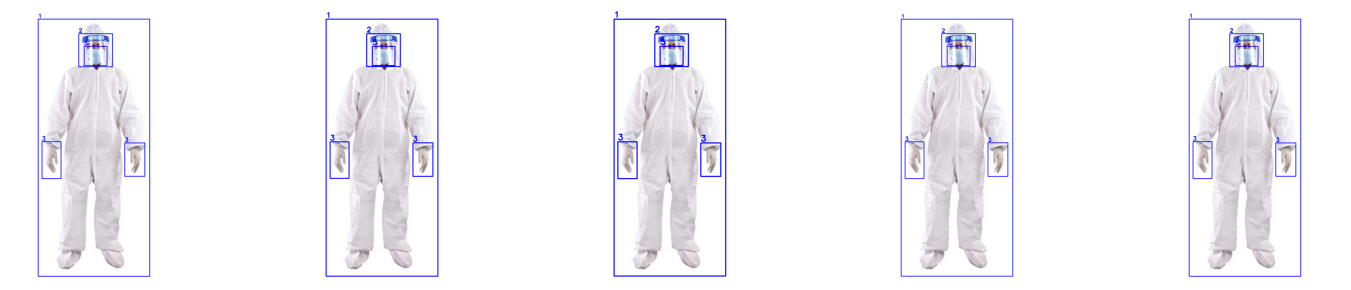

In [13]:
visualized_images = []
num_images = 5
for i in range(num_images):
    # Load random image from CPPE-5 dataset
    img = Image.open('../assets/CPPE-5/images/1.png')
    # Load annotation
    with open('../assets/CPPE-5/annotations/train.json') as f:
        annotations = json.load(f)
        
    target = {'labels': [], 'boxes': []}
    for annot in annotations['annotations']:
        if annot['image_id'] == 1:
            target['labels'].append(annot['category_id'])
            target['boxes'].append(annot['bbox'])
            
    scales = [480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800]
    
    transform = T.Compose([
            T.RandomResize(scales, max_size=1333),
            T.ToTensor(),
            # T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    target['boxes'] = T.box_to_xy(torch.Tensor(target['boxes']))
    target['labels'] = torch.Tensor(target['labels'])
    img, target = transform(img, target)
    
    
    visualized_img = visualize_output(
        imgs = img.unsqueeze(0),
        masks = torch.zeros_like(img),
        image_ids = [1],
        out_labs = [torch.tensor(target['labels'])],
        out_bboxes = [torch.tensor(target['boxes'])],
        gt_labs = [[]],
        gt_bboxes = [[]],
        unormalize = False
    )[1]

    visualized_images.append(visualized_img)

# Create figure with 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, img in zip(axes, visualized_images):
    ax.imshow(img)
    ax.axis('off')  # hide axes for a clean look

plt.tight_layout()
plt.show()

# Final check

/tmp/ipykernel_66363/1752829494.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_labs = [torch.tensor(target['labels'])],
/tmp/ipykernel_66363/1752829494.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_bboxes = [torch.tensor(target['boxes'])],


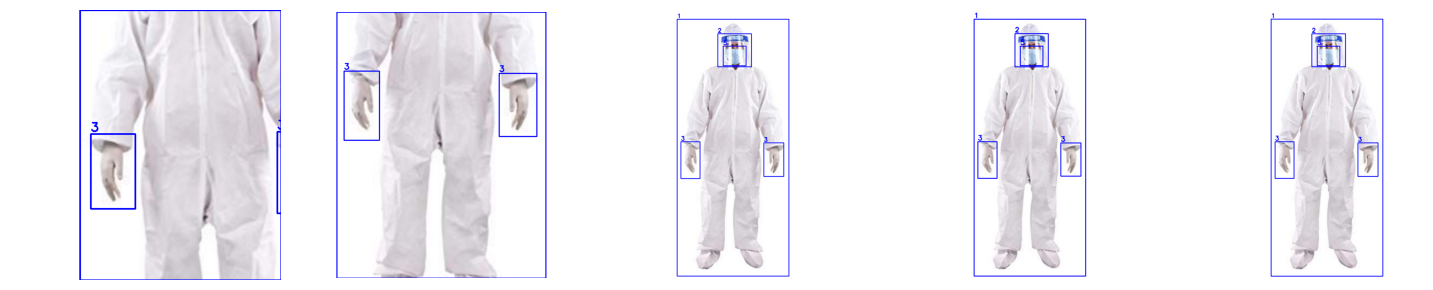

In [15]:
visualized_images = []
num_images = 5
for i in range(num_images):
    # Load random image from CPPE-5 dataset
    img = Image.open('../assets/CPPE-5/images/1.png')
    # Load annotation
    with open('../assets/CPPE-5/annotations/train.json') as f:
        annotations = json.load(f)
        
    target = {'labels': [], 'boxes': []}
    for annot in annotations['annotations']:
        if annot['image_id'] == 1:
            target['labels'].append(annot['category_id'])
            target['boxes'].append(annot['bbox'])
            
    scales = [480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800]
    
    transform = T.Compose([
            T.RandomHorizontalFlip(),
            T.RandomSelect(
                T.RandomResize(scales, max_size=1333),
                T.Compose(
                    [
                        T.RandomResize([400, 500, 600]),
                        T.RandomSizeCrop(384, 600),
                        T.RandomResize(scales, max_size=1333),
                    ]
                ),
            ),
            T.ToTensor(),
            T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    target['boxes'] = T.box_to_xy(torch.Tensor(target['boxes']))
    target['labels'] = torch.Tensor(target['labels'])
    img, target = transform(img, target)
    
    
    visualized_img = visualize_output(
        imgs = img.unsqueeze(0),
        masks = torch.zeros_like(img),
        image_ids = [1],
        out_labs = [torch.tensor(target['labels'])],
        out_bboxes = [torch.tensor(target['boxes'])],
        gt_labs = [[]],
        gt_bboxes = [[]],
        unormalize = True
    )[1]

    visualized_images.append(visualized_img)

# Create figure with 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, img in zip(axes, visualized_images):
    ax.imshow(img)
    ax.axis('off')  # hide axes for a clean look

plt.tight_layout()
plt.show()